# Red Wine Quality

Chun Sang Au Yong, Ronald Chao, Akm Islam

Red wine is a common luxury drink around the world. The quality of red wine may vary from season to season, even within the same brand. In this study, we will use different variables to predict the quality of red wine.

In [ ]:
### Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import tree

import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential

For importing files, we mount to Google Drive. The file path depends on the user operating.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
wine = pd.read_csv('/content/drive/MyDrive/AMS 380 Project/winequality-red.csv') 

In [ ]:
wine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv') 

In [ ]:
wine.head()       # Print table of data.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
x = wine.drop('quality', axis=1)  # Read inputs as all attributes.
y = wine['quality']               # Read output as wine quality.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)  # Split input data into training and testing sets.

# Exploratory Analysis

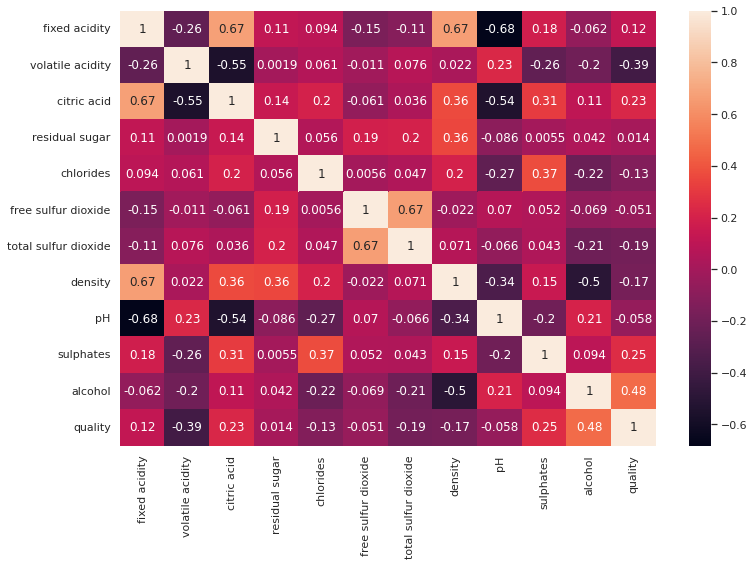

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})   # Set figure size.
corr = wine.corr()                      # Obtain correlation matrix.
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True) # Print correlation matrix as a heatmap.

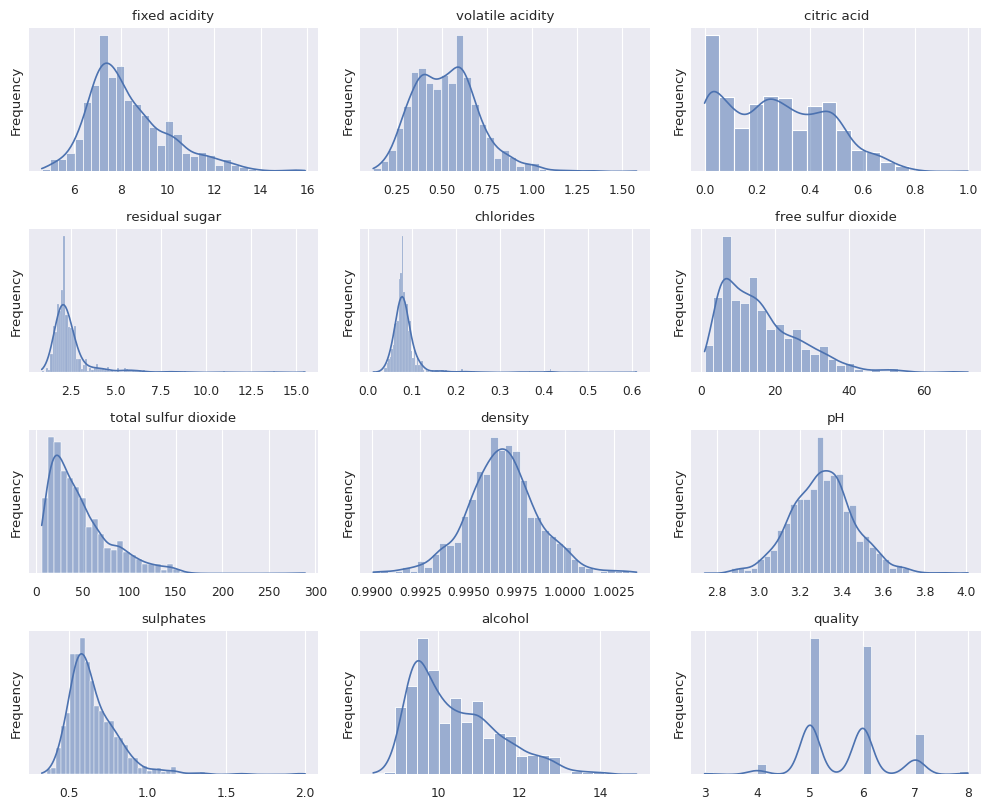

In [ ]:
fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
sns.set_theme()
sns.set_context("paper")
for i, col in enumerate(wine.columns):
  ax = fig.add_subplot(10, 3, i + 1)
  sns.histplot(wine[col], kde=True)
  ax.set_title(col)
  ax.set_yticks([])
  ax.set_ylabel("Frequency")
  ax.set_xlabel(None)
  ax.tick_params(left=False, bottom=False)
  for ax, spine in ax.spines.items():
    spine.set_visible(False)

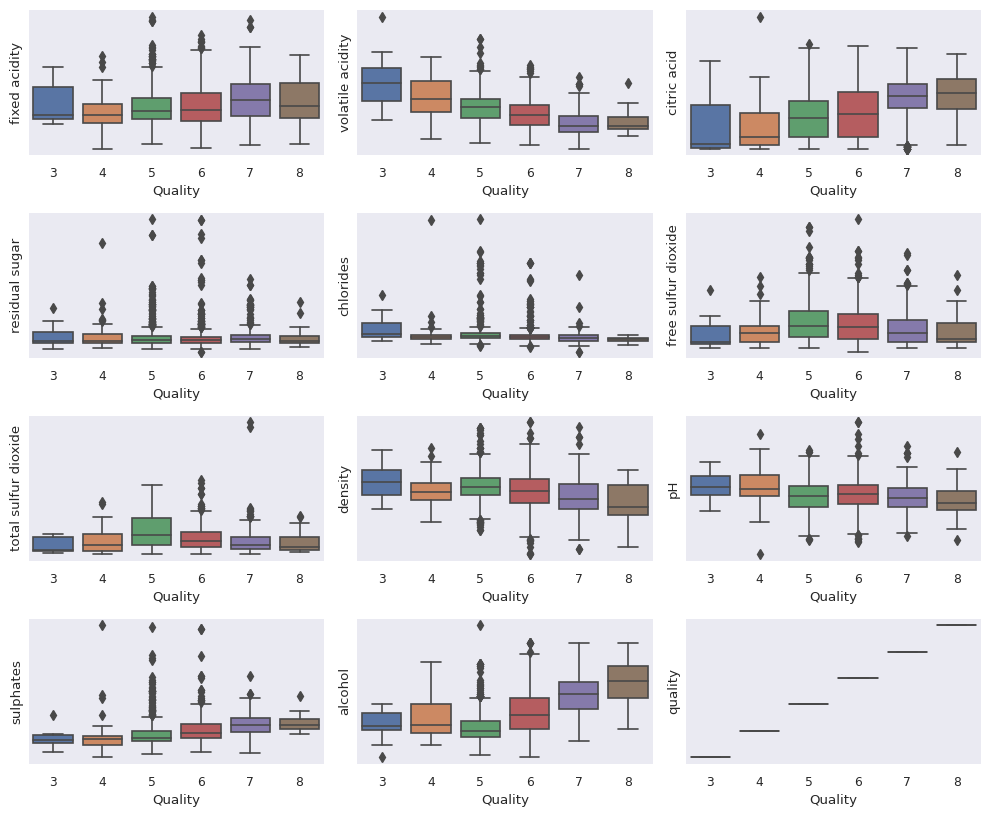

In [ ]:
fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
sns.set_theme()
sns.set_context("paper")
for i, col in enumerate(wine.columns):
  ax = fig.add_subplot(10, 3, i + 1)
  sns.boxplot(x=wine['quality'], y=wine[col])
  ax.set_yticks([])
  ax.set_xlabel("Quality")
  ax.set_ylabel(col)
  ax.tick_params(left=False, bottom=False)
  for ax, spine in ax.spines.items():
    spine.set_visible(False)

# Linear Regression

In [ ]:
reg = LinearRegression()      # Obtain Linear Regression model.
reg.fit(x_train, y_train)     # Fit the training data.

y_pred = reg.predict(x_test)  # Obtain prediction model.
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))  # Calculate the RMSE of prediction model against test set.
r2 = reg.score(x_test, y_test)# Calculate R2 of the test set.

print(f'RMSE = {rmse}.')      # Print RMSE.
print(f'R2 = {r2}.')          # Print R2.

RMSE = 0.6189280908000766.
R2 = 0.32664027269868323.


In [ ]:
# cross validation
scores = cross_val_score(reg, x, y, scoring="neg_mean_squared_error",cv=10)
for metric, score in zip(sklearn.metrics.SCORERS.keys(), scores):
  print(f'{metric} = {score}.')

explained_variance = -0.47093648154773415.
r2 = -0.40001873534688226.
max_error = -0.46928925367514635.
neg_median_absolute_error = -0.43172350252871833.
neg_mean_absolute_error = -0.37665658254424456.
neg_mean_absolute_percentage_error = -0.5235984116150946.
neg_mean_squared_error = -0.40046081138267126.
neg_mean_squared_log_error = -0.4294495298770964.
neg_root_mean_squared_error = -0.3617952147587233.
neg_mean_poisson_deviance = -0.48792051702461314.


#Decision Tree

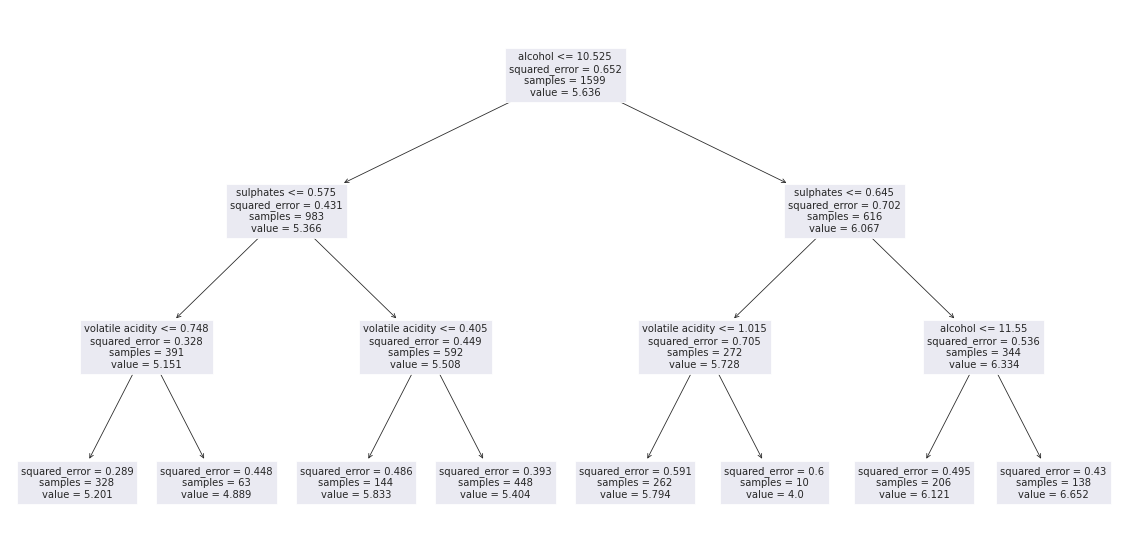

In [ ]:
d_tree = tree.DecisionTreeRegressor(max_depth = 3).fit(x,y)
plt.figure(figsize=(20,10))
fig = tree.plot_tree(d_tree, feature_names=x.columns,fontsize = 10) 
# d_tree.

In [ ]:
def run_cross_validation_on_trees_depths(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = tree.DecisionTreeRegressor(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [ ]:
def run_cross_validation_on_trees_minleafs(X, y, samples, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for s in samples:
        tree_model = tree.DecisionTreeRegressor(min_samples_leaf=s)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [ ]:
def run_cross_validation_on_trees_splits(X, y, splits, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for s in splits:
        tree_model = tree.DecisionTreeRegressor(min_samples_split=s)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

In [ ]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation score', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Input Parameter', fontsize=14)
    ax.set_ylabel('Score', fontsize=14)
    ax.set_ylim((0,1.2))
   # ax.set_yticks(range(0,1, 2))
    ax.set_xticks(depths)
    ax.legend()

In [ ]:
depths = range (1,20)
leafs = range (1,20)
splits = range (2,20)

In [ ]:
d_mean, d_std, d_accuracy = run_cross_validation_on_trees_depths(x_train, y_train, depths)
l_mean, l_std, l_accuracy = run_cross_validation_on_trees_minleafs(x_train, y_train, leafs)
s_mean, s_std, s_accuracy = run_cross_validation_on_trees_splits(x_train, y_train, splits)

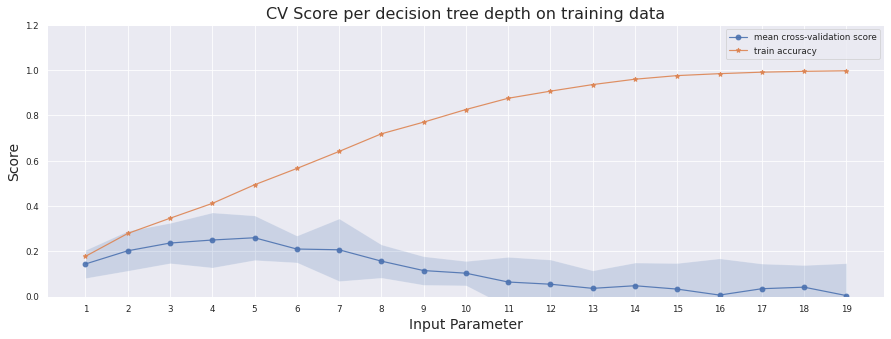

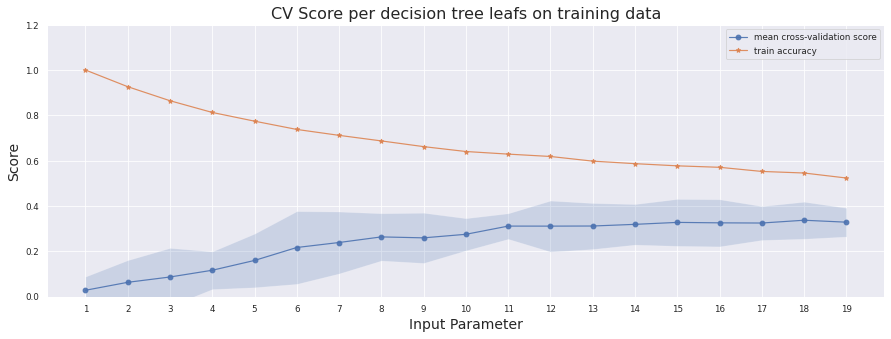

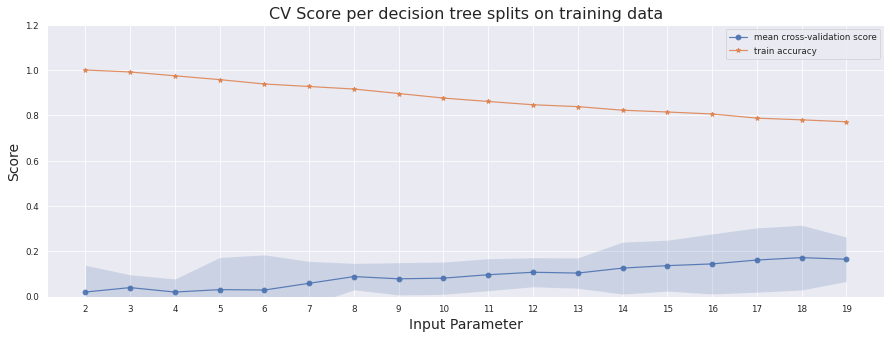

In [ ]:
plot_cross_validation_on_trees(depths, d_mean, d_std, d_accuracy,'CV Score per decision tree depth on training data')
plot_cross_validation_on_trees(leafs, l_mean, l_std, l_accuracy, 'CV Score per decision tree leafs on training data')
plot_cross_validation_on_trees(splits, s_mean, s_std, s_accuracy,'CV Score per decision tree splits on training data')

# Innovation - SVM Modeling

In [ ]:
from sklearn import svm

# svm_model = svm.SVC() # Obtain SVM Model.
svm_model = svm.SVC(kernel='linear', C=1, random_state=42).fit(x_train, y_train) # Fit the training data.
svm_model.score(x_test,y_test)  # Fit the testing data

0.596875

In [ ]:
svm_model = svm.SVR(kernel='linear', C=1).fit(x_train, y_train) # Fit the training data.
svm_model.score(x_test,y_test)

0.32534380766349535

# Innovation - Neural Network

In [ ]:
model = Sequential()
model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 2670)              32040     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2671      
Total params: 34,843
Trainable params: 34,843
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

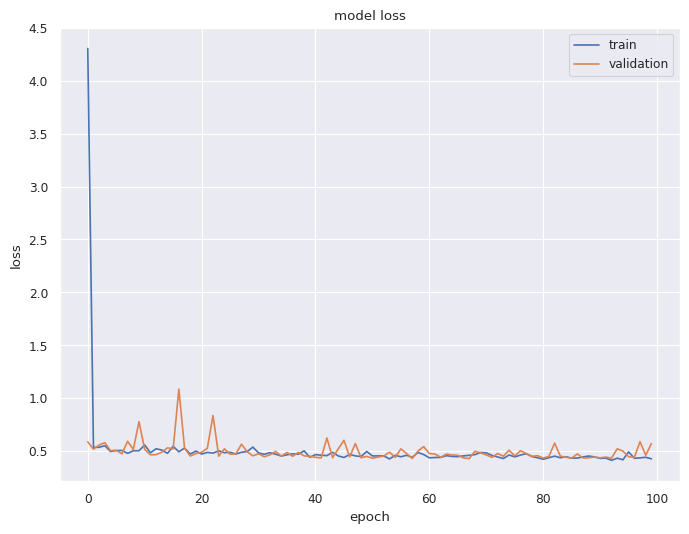

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.5319 - mse: 0.5319 - mae: 0.5933


[0.5318573117256165, 0.5318573117256165, 0.5932847857475281]

In [ ]:
cross_val_score(model, x_test, y_test)

# Conclusion

In this study we have experimented various ways of predicting red wine quality, from both the regression and classification perspective. Neural network was also experimented on the data set in an attempt to model the non-linearity. In general, we find that the quality of red wine is easy to model given enough features. 